In [1]:
%matplotlib inline
import os,sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
deep = pd.read_pickle('/Users/nsevilla/des/data/deep_ugriz.mof02_sn.jhk.ff04_c.jhk.ff02_v0.133_realerrors.pkl')

In [96]:
deep.FIELD


97184      COSMOS
97216      COSMOS
97259      COSMOS
97338      COSMOS
97421      COSMOS
97427      COSMOS
97433      COSMOS
97438      COSMOS
97441      COSMOS
97452      COSMOS
97456      COSMOS
97462      COSMOS
97464      COSMOS
97467      COSMOS
97479      COSMOS
97481      COSMOS
97484      COSMOS
97486      COSMOS
97491      COSMOS
97495      COSMOS
97496      COSMOS
97500      COSMOS
97503      COSMOS
97504      COSMOS
97508      COSMOS
97509      COSMOS
97514      COSMOS
97516      COSMOS
97517      COSMOS
97518      COSMOS
            ...  
2826908        E2
2826909        E2
2826910        E2
2826911        E2
2826912        E2
2826913        E2
2826914        E2
2826915        E2
2826916        E2
2826918        E2
2826924        E2
2826926        E2
2826927        E2
2826928        E2
2826930        E2
2826931        E2
2826934        E2
2826935        E2
2826937        E2
2826938        E2
2826944        E2
2826947        E2
2826949        E2
2826950        E2
2826951   

In [88]:
magerr_u = (2.5/np.log(10))*(deep.BDF_FLUX_ERR_DERED_U/deep.BDF_FLUX_DERED_U)
magerr_g = (2.5/np.log(10))*(deep.BDF_FLUX_ERR_DERED_G/deep.BDF_FLUX_DERED_G)
magerr_r = (2.5/np.log(10))*(deep.BDF_FLUX_ERR_DERED_R/deep.BDF_FLUX_DERED_R)
magerr_i = (2.5/np.log(10))*(deep.BDF_FLUX_ERR_DERED_I/deep.BDF_FLUX_DERED_I)
magerr_z = (2.5/np.log(10))*(deep.BDF_FLUX_ERR_DERED_Z/deep.BDF_FLUX_DERED_Z)
magerr_j = (2.5/np.log(10))*(deep.BDF_FLUX_ERR_DERED_J/deep.BDF_FLUX_DERED_J)
magerr_h = (2.5/np.log(10))*(deep.BDF_FLUX_ERR_DERED_H/deep.BDF_FLUX_DERED_H)
magerr_k = (2.5/np.log(10))*(deep.BDF_FLUX_ERR_DERED_K/deep.BDF_FLUX_DERED_K)

In [89]:
deep['BDF_MAG_ERR_DERED_U'] = magerr_u
deep['BDF_MAG_ERR_DERED_G'] = magerr_g
deep['BDF_MAG_ERR_DERED_R'] = magerr_r
deep['BDF_MAG_ERR_DERED_I'] = magerr_i
deep['BDF_MAG_ERR_DERED_Z'] = magerr_z
deep['BDF_MAG_ERR_DERED_J'] = magerr_j
deep['BDF_MAG_ERR_DERED_H'] = magerr_h
deep['BDF_MAG_ERR_DERED_K'] = magerr_k

In [107]:
field = "X3"
deep_sn10 = []
deep_sn10.append(deep[(deep.BDF_MAG_ERR_DERED_U.between(0.106,0.11)) & (deep.FIELD == field)]) 
deep_sn10.append(deep[(deep.BDF_MAG_ERR_DERED_G.between(0.106,0.11)) & (deep.FIELD == field)]) 
deep_sn10.append(deep[(deep.BDF_MAG_ERR_DERED_R.between(0.106,0.11)) & (deep.FIELD == field)]) 
deep_sn10.append(deep[(deep.BDF_MAG_ERR_DERED_I.between(0.106,0.11)) & (deep.FIELD == field)]) 
deep_sn10.append(deep[(deep.BDF_MAG_ERR_DERED_Z.between(0.106,0.11)) & (deep.FIELD == field)])
deep_sn10.append(deep[(deep.BDF_MAG_ERR_DERED_J.between(0.106,0.11)) & (deep.FIELD == field)]) 
deep_sn10.append(deep[(deep.BDF_MAG_ERR_DERED_H.between(0.106,0.11)) & (deep.FIELD == field)]) 
deep_sn10.append(deep[(deep.BDF_MAG_ERR_DERED_K.between(0.106,0.11)) & (deep.FIELD == field)]) 

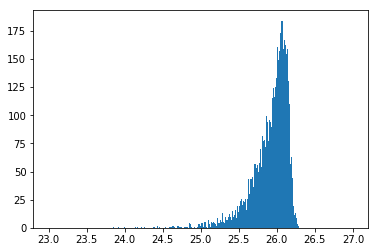

In [84]:
n, b, patches = plt.hist(deep_sn10.BDF_MAG_DERED_G,bins=300,range=[23,27])

In [108]:
count = 0
for band in ["U","G","R","I","Z","J","H","K"]:
    print(band,np.median(deep_sn10[count]['BDF_MAG_DERED_'+band]))
    count = count + 1

U 24.40975405219187
G 25.772766992785616
R 25.506580824880313
I 24.917377621264407
Z 24.23020942840253
J 24.580321594861637
H 24.20667257018313
K 23.761322949335543


In [66]:
deep['mag_bins'], retbins = pd.cut(deep.BDF_MAG_DERED_I,1000,retbins=True)

In [67]:
deep.mag_bins.unique()

[(21.639, 21.659], (21.022, 21.042], (23.65, 23.67], (21.819, 21.839], (25.482, 25.502], ..., (32.531, 32.551], (15.029, 15.049], (15.666, 15.686], (16.702, 16.721], (15.467, 15.487]]
Length: 821
Categories (821, interval[float64]): [(12.879, 12.918] < (13.337, 13.357] < (13.775, 13.795] < (13.994, 14.014] ... (32.371, 32.391] < (32.451, 32.471] < (32.531, 32.551] < (32.789, 32.809]]

In [68]:
print(retbins)

[12.87864621 12.91846781 12.93837861 ... 32.76953397 32.78944477
 32.80935557]


In [71]:
i = 50
j = i+1
for i in range(500,800):
    deep_test = deep[deep.BDF_MAG_DERED_I.between(retbins[i],retbins[i+1])]
    print(retbins[i],retbins[i+1])
    print(np.median(deep_test.BDF_MAG_ERR_DERED_I))
    print("\n")

22.853956288715583 22.87386708726899
0.021584696930291063


22.87386708726899 22.893777885822395
0.022096023990422167


22.893777885822395 22.9136886843758
0.021943638759412295


22.9136886843758 22.933599482929203
0.02252732284990288


22.933599482929203 22.953510281482608
0.022864886060315517


22.953510281482608 22.97342108003601
0.02312504441944707


22.97342108003601 22.99333187858942
0.024021891931124827


22.99333187858942 23.013242677142824
0.023797088961787536


23.013242677142824 23.03315347569623
0.024258960724231244


23.03315347569623 23.053064274249635
0.02447265346425592


23.053064274249635 23.07297507280304
0.024785429781834456


23.07297507280304 23.092885871356444
0.025073579917957896


23.092885871356444 23.112796669909848
0.02569443215912333


23.112796669909848 23.132707468463252
0.025811551357818305


23.132707468463252 23.152618267016656
0.026471240883329097


23.152618267016656 23.172529065570064
0.02681754551130737


23.172529065570064 23.192439864123468
0.026

25.701200481852496 25.7211112804059
0.1871100518702668


25.7211112804059 25.741022078959304
0.18925942345866498


25.741022078959304 25.76093287751271
0.19223180821867375


25.76093287751271 25.780843676066116
0.19539598787063234


25.780843676066116 25.800754474619524
0.1979508557008507


25.800754474619524 25.820665273172928
0.20106305493148985


25.820665273172928 25.840576071726332
0.20318298683986113


25.840576071726332 25.860486870279736
0.20524245393678264


25.860486870279736 25.88039766883314
0.20832163618410124


25.88039766883314 25.900308467386544
0.21177152220824877


25.900308467386544 25.92021926593995
0.21557054493495725


25.92021926593995 25.940130064493356
0.2186894728538905


25.940130064493356 25.96004086304676
0.2204444789205414


25.96004086304676 25.979951661600168
0.22455955187536167


25.979951661600168 25.999862460153572
0.22773721504117456


25.999862460153572 26.019773258706977
0.23048112730079656


26.019773258706977 26.03968405726038
0.23267671058049064

28.508623077882596 28.528533876436004
1.9614299937597548


28.528533876436004 28.54844467498941
1.9864481345778149


28.54844467498941 28.568355473542816
2.01478141447449


28.568355473542816 28.58826627209622
2.0786010686686973


28.58826627209622 28.608177070649624
2.086872315201665


28.608177070649624 28.62808786920303
2.1791634867547356


28.62808786920303 28.647998667756433
2.17779045043791


28.647998667756433 28.667909466309837
2.189970672097764


28.667909466309837 28.687820264863245
2.2440745327289475


28.687820264863245 28.70773106341665
2.306236211540673


28.70773106341665 28.727641861970053
2.350494502404708


28.727641861970053 28.74755266052346
2.4354419173135056


28.74755266052346 28.767463459076865
2.3886706387239056


28.767463459076865 28.78737425763027
2.38868142067906


28.78737425763027 28.807285056183673
2.5270724116179895


28.807285056183673 28.827195854737077
2.556877366665678




0.023077401107169267


(array([1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 6.00000e+00, 3.00000e+00, 3.00000e+00,
        3.00000e+00, 5.00000e+00, 4.00000e+00, 5.00000e+00, 9.00000e+00,
        1.00000e+01, 1.30000e+01, 1.50000e+01, 2.00000e+01, 2.80000e+01,
        3.10000e+01, 5.50000e+01, 7.20000e+01, 1.26000e+02, 1.88000e+02,
        3.04000e+02, 5.08000e+02, 7.61000e+02, 1.05600e+03, 1.32400e+03,
        1.65900e+03, 1.95500e+03, 2.34500e+03, 2.67000e+03, 3.12100e+03,
        3.66200e+03, 4.14100e+03, 4.78400e+03, 5.65400e+03, 6.33600e+03,
        7.18400e+03, 8.48800e+03, 9.73200e+03, 1.09810e+04, 1.26750e+04,
        1.45210e+04, 1.67430e+04, 1.88360e+04, 2.18450e+04, 2.48750e+04,
        2.82590e+04, 3.24020e+04, 3.71430e+04, 4.21630e+04, 4.82250e+04,
        5.45430e+04, 6.18130e+04, 6.83650e+04, 7.54200e+04, 8.27240e+04,
        8.80580e+04, 9.33130e+04, 9.82160e+04, 1.02006e+05, 1.03041e+05,
        1.00903e+05, 9.22780e+04, 7.64270e+04, 5.72

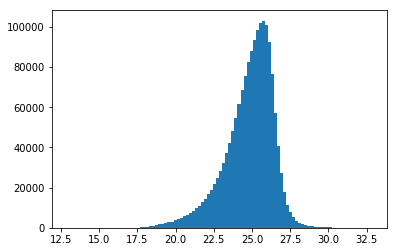

In [55]:
plt.hist(deep.BDF_MAG_DERED_I,100)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([12.39855701, 12.40855701, 12.41855701, 12.42855701, 12.43855701,
        12.44855701, 12.45855701, 12.46855701, 12.47855701, 12.48855701,
        12.49855701, 12.50855701, 12.51855701, 12.52855701, 12.53855701,
        12.54855701, 12.55855701, 12.56855701, 12.57855701, 12.58855701,
        12.59855701, 12.60855701, 12.61855701, 12.62855701, 12.63855701,
        12.64855701, 12.65855701, 12.66855701, 12.67855701, 12.68855701,
        12.69855701, 12.70855701, 12.71855701, 12.72855701, 12.73855701,
        12.74855701, 12.75855701, 12.76

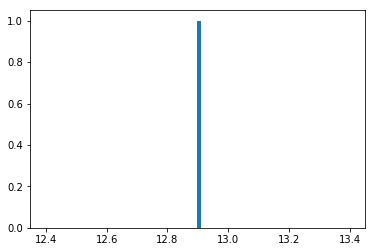

In [57]:
plt.hist(deep_test.BDF_MAG_DERED_I,100)

In [58]:
print(deep_test)

         BDF_FLUX_DERED_G  BDF_FLUX_DERED_I  BDF_FLUX_DERED_R  \
1930743      4.211318e+06      6.927511e+06      6.393278e+06   

         BDF_FLUX_DERED_U  BDF_FLUX_DERED_Z  BDF_FLUX_ERR_DERED_G  \
1930743      3.246268e+06      7.318470e+06          2.124182e+06   

         BDF_FLUX_ERR_DERED_I  BDF_FLUX_ERR_DERED_R  BDF_FLUX_ERR_DERED_U  \
1930743          3.495565e+06          3.224704e+06          1.640632e+06   

         BDF_FLUX_ERR_DERED_Z        ...         BDF_MAG_DERED_J  \
1930743          3.699355e+06        ...               12.078318   

         BDF_MAG_DERED_K   DEC_jhk  FLAGS_jhk  MASK_FLAGS_jhk    RA_jhk  \
1930743        12.218906 -4.614636          0               0  35.96291   

         TILENAME_jhk  FIELD  BDF_MAG_ERR_DERED_I          mag_bins  
1930743     SN-X3_C33     X3             0.547854  (12.879, 13.098]  

[1 rows x 38 columns]
